In [ ]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [ ]:
!python -c "import torch; print(torch.__version__)"

1.11.0+cu113


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html


In [ ]:
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-1.10.0+cu113.html

     |████████████████████████████████| 2.5 MB 4.4 MB/s 


In [ ]:
from torch_geometric.datasets import EllipticBitcoinDataset

In [ ]:
from torch_geometric.transforms import NormalizeFeatures

In [ ]:
from torch_geometric.nn import Node2Vec

In [ ]:
dataset=EllipticBitcoinDataset(root="/",transform=NormalizeFeatures())

NameError: ignored

In [ ]:
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(50*'=')

# There is only one graph in the dataset, use it as new data object
data = dataset[0]

# Gather some statistics about the graph.
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Is undirected: {data.is_undirected()}')

Number of graphs: 1
Number of features: 165
Number of classes: 2
Data(x=[203769, 165], edge_index=[2, 234355], y=[203769], train_mask=[203769], test_mask=[203769])
Number of nodes: 203769
Number of edges: 234355
Number of training nodes: 29894
Training node label rate: 0.15
Is undirected: False


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-1.11.0+.html
     |████████████████████████████████| 43 kB 1.0 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 350, in run
    global_options=[],
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/wheel_builder.py", line 337, in build
    req, cache_dir, verify, build_options, global_options
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/wheel_builder.py", line 224, in _build_one
    req, output_dir, build_options, global_options
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/wheel_builder.py", line 268, in _buil

In [ ]:
import torch_cluster

In [ ]:
import torch

In [ ]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [ ]:
import torch_geometric

In [ ]:
model = Node2Vec(data.edge_index, embedding_dim=165, walk_length=20,
             context_size=10, walks_per_node=10,num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [ ]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=10)
    return acc


for epoch in range(1, 100):
    loss = train()
    #acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01, Loss: 3.9642
Epoch: 02, Loss: 1.5897
Epoch: 03, Loss: 1.0164
Epoch: 04, Loss: 0.8572
Epoch: 05, Loss: 0.7968
Epoch: 06, Loss: 0.7673
Epoch: 07, Loss: 0.7507
Epoch: 08, Loss: 0.7405
Epoch: 09, Loss: 0.7337
Epoch: 10, Loss: 0.7291
Epoch: 11, Loss: 0.7258
Epoch: 12, Loss: 0.7235
Epoch: 13, Loss: 0.7218
Epoch: 14, Loss: 0.7207
Epoch: 15, Loss: 0.7199
Epoch: 16, Loss: 0.7195
Epoch: 17, Loss: 0.7193
Epoch: 18, Loss: 0.7193
Epoch: 19, Loss: 0.7194
Epoch: 20, Loss: 0.7197
Epoch: 21, Loss: 0.7200
Epoch: 22, Loss: 0.7204
Epoch: 23, Loss: 0.7208
Epoch: 24, Loss: 0.7212
Epoch: 25, Loss: 0.7216
Epoch: 26, Loss: 0.7219


KeyboardInterrupt: ignored

In [ ]:
z=model()

torch.Size([203769, 128])

In [ ]:
data.x+=z.cpu()

In [ ]:
data.x.shape

torch.Size([203769, 165])

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv #GATConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # Initialize the layers
        self.conv1 = GCNConv(165, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.out = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer
        x = F.softmax(self.out(x), dim=1)
        return x

model = GCN(hidden_channels=256)
print(model)

GCN(
  (conv1): GCNConv(165, 256)
  (conv2): GCNConv(256, 256)
  (out): Linear(in_features=256, out_features=2, bias=True)
)


In [ ]:
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
# Initialize model
model=model.to(device)
# Use GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
data = data.to(device)

# Initialize Optimizer
learning_rate = 0.01
decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate,
                             weight_decay=decay)
# Define loss function (CrossEntropyLoss for Classification Problems with
# probability distributions)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()
      # Use all data as input, because all nodes have node features
      out = model(data.x.to(device), data.edge_index.to(device))
      # Only use nodes with labels available for loss calculation --> mask
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      # Use the class with highest probability.
      pred = out.argmax(dim=1)
      # Check against ground-truth labels.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      # Derive ratio of correct predictions.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc

losses = []
for epoch in range(0, 1001):
    loss = train()
    losses.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 000, Loss: 0.7101
Epoch: 100, Loss: 0.4219
Epoch: 200, Loss: 0.4205
Epoch: 300, Loss: 0.4193
Epoch: 400, Loss: 0.4122
Epoch: 500, Loss: 0.3753
Epoch: 600, Loss: 0.3623
Epoch: 700, Loss: 0.3582
Epoch: 800, Loss: 0.3558
Epoch: 900, Loss: 0.3538
Epoch: 1000, Loss: 0.3527


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


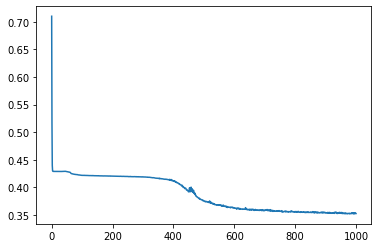

In [ ]:
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i,l in enumerate(losses_float)]
plt = sns.lineplot(loss_indices, losses_float)

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.9203


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plt2arr(fig):
    rgb_str = fig.canvas.tostring_rgb()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
    return rgba_arr


def visualize(h, color, epoch):
    fig = plt.figure(figsize=(5,5), frameon=False)
    fig.suptitle(f'Epoch = {epoch}')
    # Fit TSNE with 2 components
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())

    # Create scatterplot from embeddings
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0],
                z[:, 1],
                s=70,
                c=color.detach().cpu().numpy(),
                cmap="Set2")
    fig.canvas.draw()

    # Convert to numpy
    return plt2arr(fig)


In [ ]:
out = model(data.x, data.edge_index)
visualize(out, color=data.y, epoch=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
